# Kaggle 的一个 Kernel：marsggbo - 房价预测kaggle入门项目

地址：

https://www.kaggle.com/marsggbo/kaggle/notebook

https://www.kaggle.com/marsggbo/kaggle/notebook

https://www.kaggle.com/marsggbo/kaggle/notebook

In [1]:
# 用来绘图的，封装了 matplotlib
# 要注意的是一旦导入了seaborn，
# matplotlib 的默认作图风格就会被覆盖成seaborn的格式
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# 为了在jupyter notebook里作图，需要用到这个命令

In [3]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 二、观察各项主要特征与房屋售价的关系

为了能更好的判断各项特征对“房价”的关系，我们需要花上一点时间来对数据进行研究和处理。虽然比较耗时和费事，但是这会让我们后面构建模型的时候事半功倍。

### 1、分析 SalePrice

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

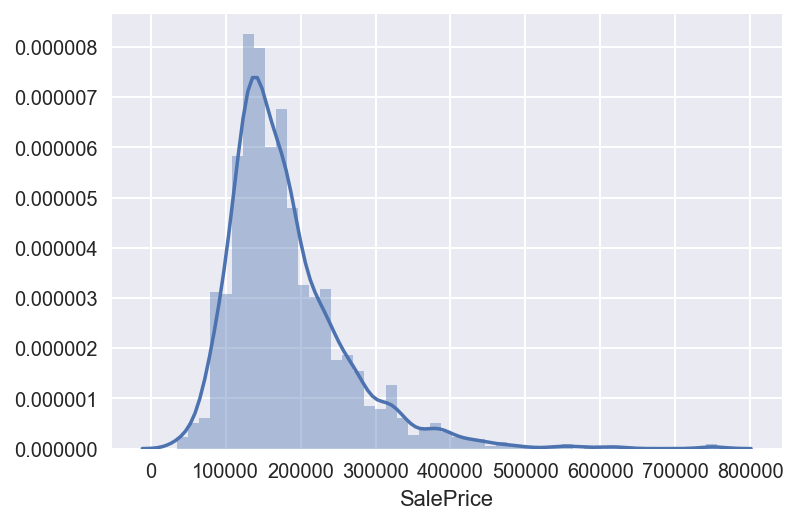

In [6]:
# 单变量数据分析 hist，kde
sns.distplot(df_train['SalePrice'])

+ 偏度：偏度（Skewness）是描述某变量取值分布对称性的统计量。

Skewness=0 分布形态与正态分布偏度相同

Skewness>0 正偏差数值较大，为正偏或右偏。长尾巴拖在右边。

Skewness<0 负偏差数值较大，为负偏或左偏。长尾巴拖在左边。 

计算公式： S= (X^ - M_0)/δ Skewness 越大，分布形态偏移程度越大。

In [7]:
df_train['SalePrice'].skew()

1.8828757597682129

+ 峰度：峰度（Kurtosis）是描述某变量所有取值分布形态陡缓程度的统计量。
它是和正态分布相比较的。

Kurtosis=0 与正态分布的陡缓程度相同。

Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰

Kurtosis<0 比正态分布的高峰来得平台——平顶峰计算公式：β = M_4 /σ^4 偏度：

In [8]:
df_train['SalePrice'].kurt()

6.536281860064529

In [9]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [10]:
df_train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Variable	Segment	Data Type	Comments

LotArea	1	0	地皮面积

GrLivArea	1	0	生活面积

TotalBsmtSF	1	0	地下室总面积

MiscVal	0	0	其他资产

GarageArea/GarageCars	1	0	车库

YearBuilt	0	1	建造年份

CentralAir	0	1	中央空调

OverallQual	0	1	总体评价

Neighborhood	2	1	地段

In [11]:
var = 'CentralAir'

df_train[var].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

## 绘制箱线图，以下是根据类别绘制箱线图

In [13]:
data = pd.concat([df_train[var], df_train['SalePrice']], axis=1)
df_train[var].unique()

array(['Y', 'N'], dtype=object)

(-0.5, 1.5, 0, 800000)

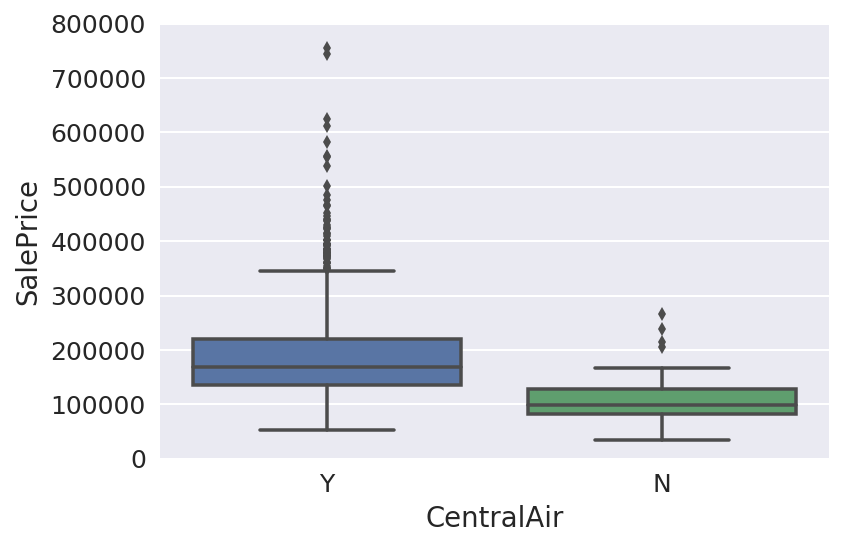

In [57]:
# var 是一个类别变量
fig = sns.boxplot(x=var, y='SalePrice', data=df_train)
fig.axis(ymin=0, ymax=800000)

## OverallQual 总体评价

In [61]:
df_train['OverallQual'].value_counts().sort_index()

1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: OverallQual, dtype: int64

In [60]:
df_train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

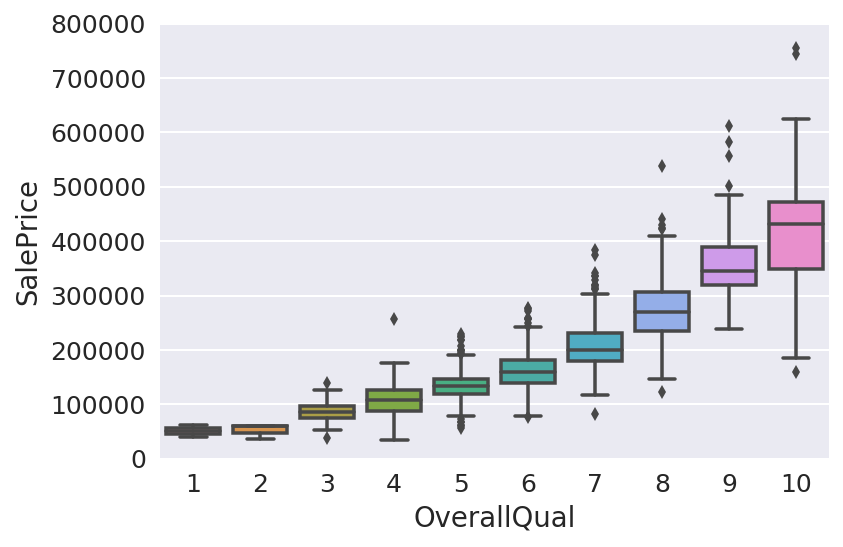

In [66]:
var = 'OverallQual'

data = pd.concat([df_train[var], df_train['SalePrice']], axis=1)

fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

## YearBuilt 建造年份

(-0.5, 111.5, 0, 800000)

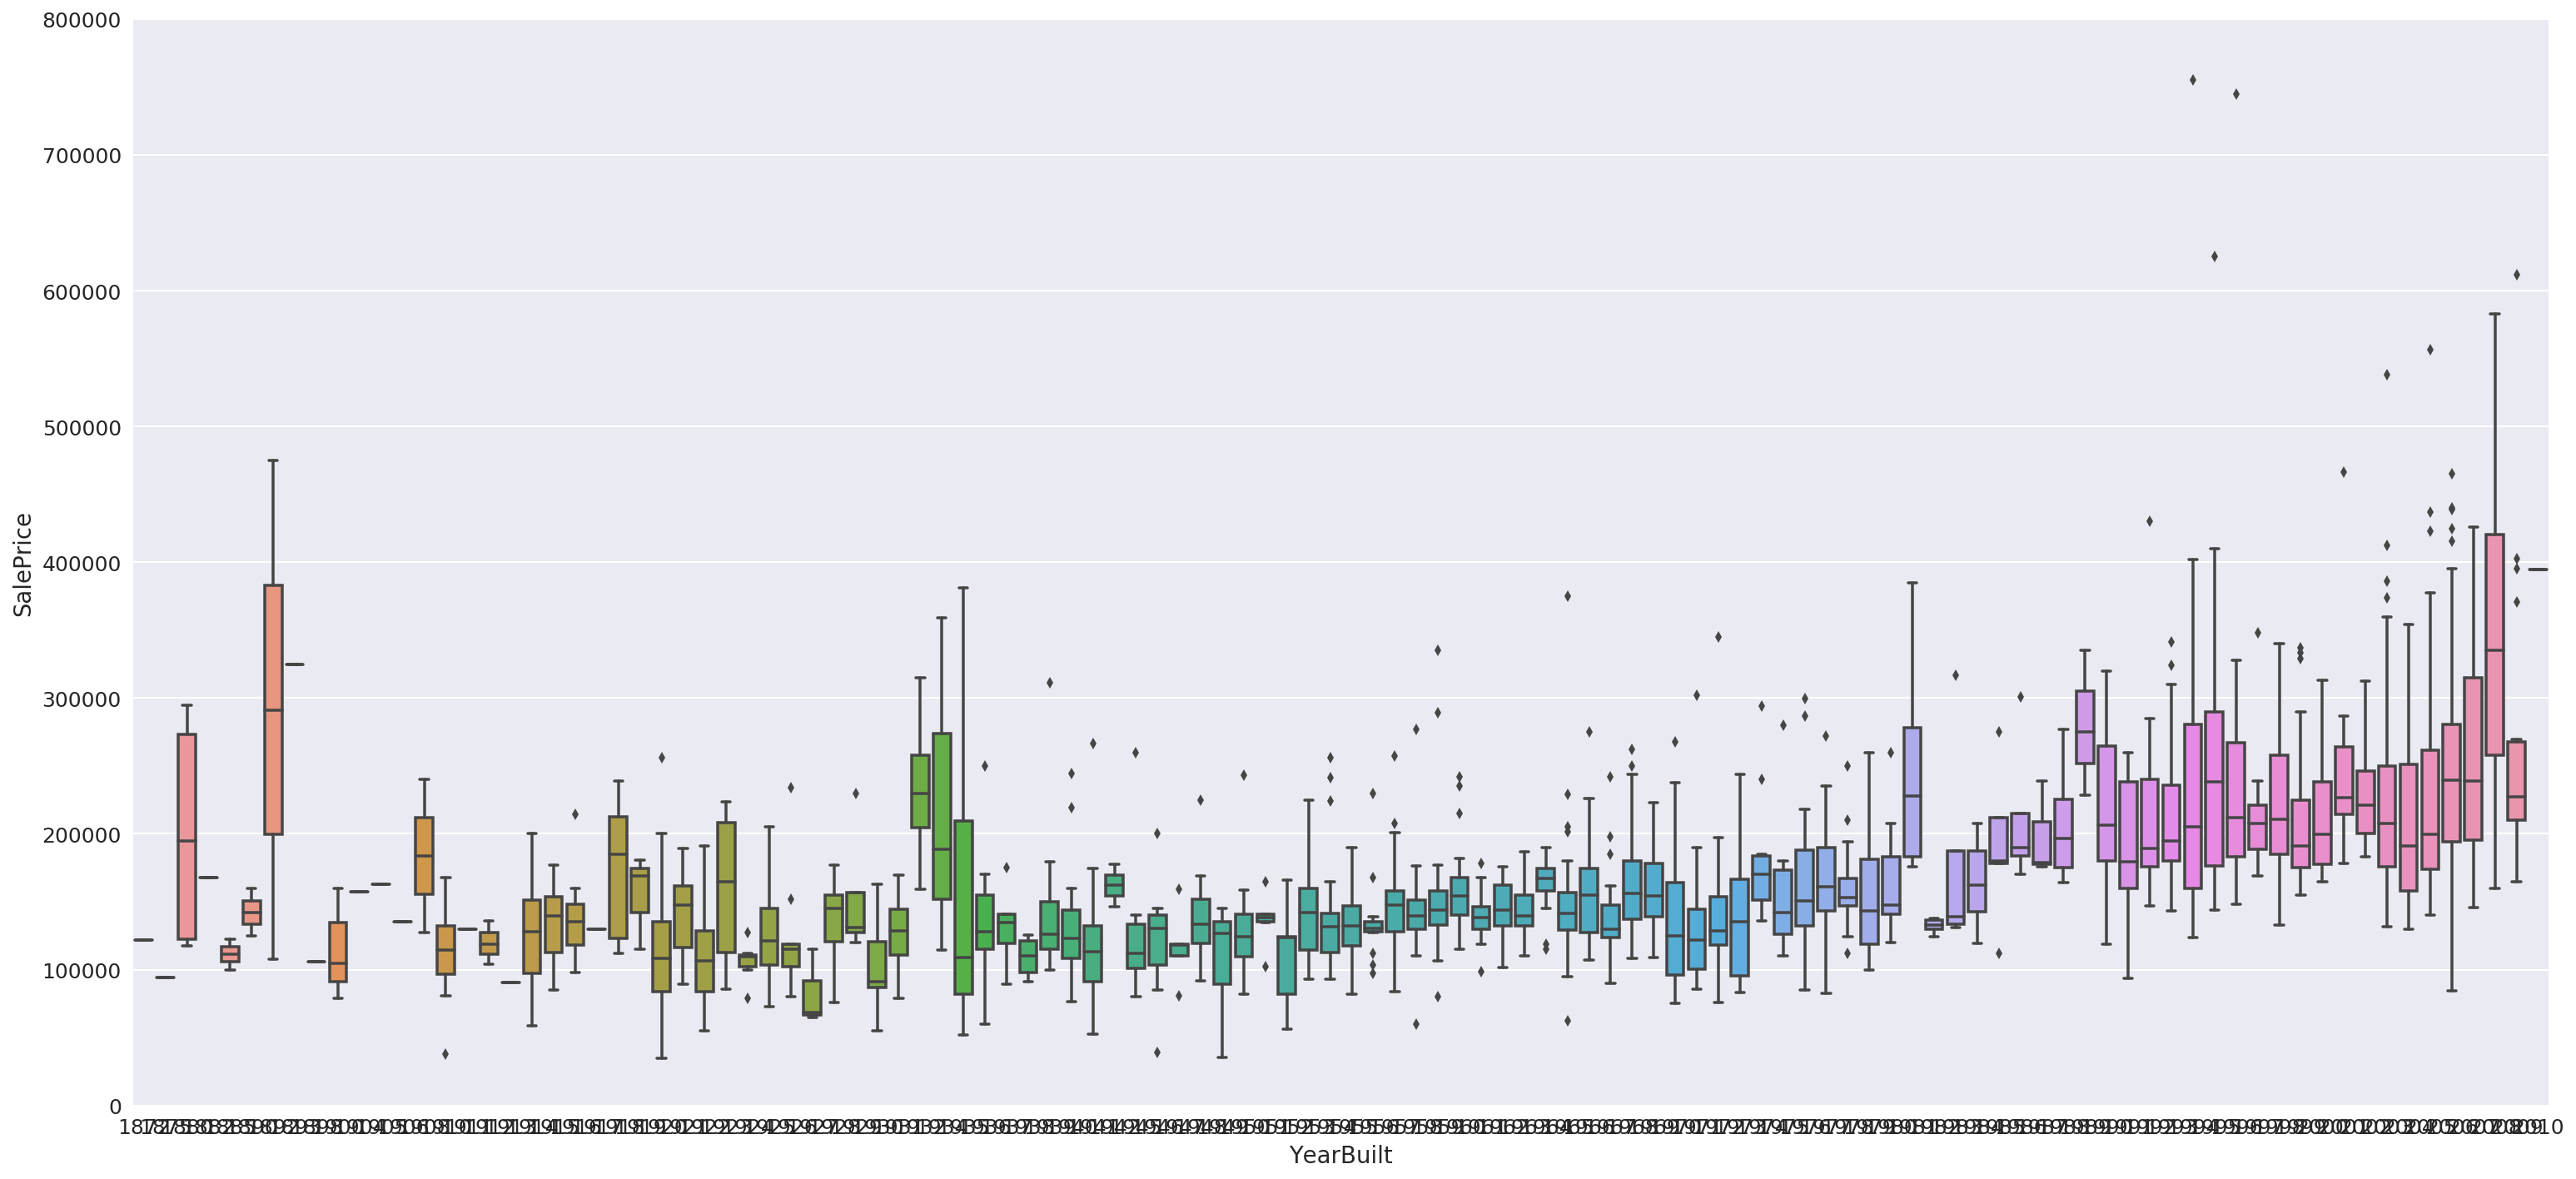

In [76]:
var = 'YearBuilt'
data = pd.concat([df_train[var], df_train['SalePrice']], axis=1)

f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

### 绘制散点图（散点图一般用于两个连续型变量）

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


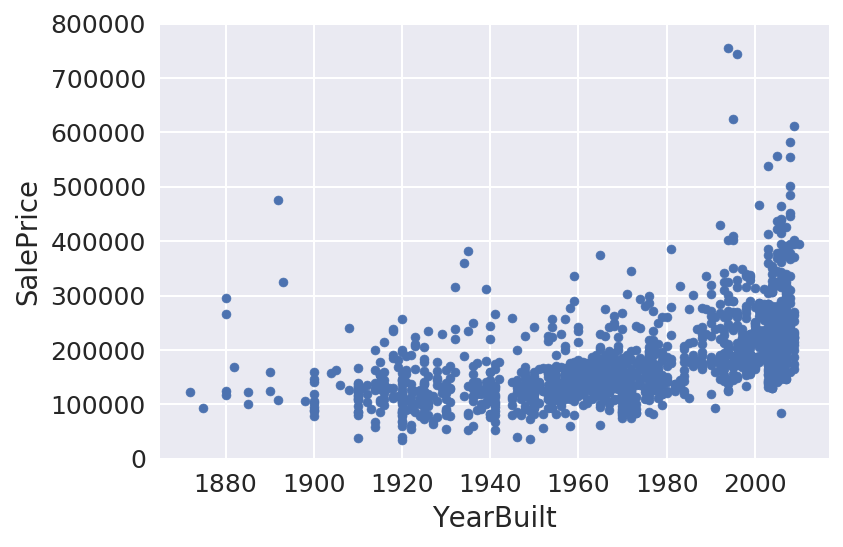

In [78]:
var = 'YearBuilt'

data = pd.concat([df_train[var], df_train['SalePrice']], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

Neighborhood: Physical locations within Ames city limits

Neighborhood: Physical locations within Ames city limits

In [80]:
df_train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

(-0.5, 24.5, 0, 800000)

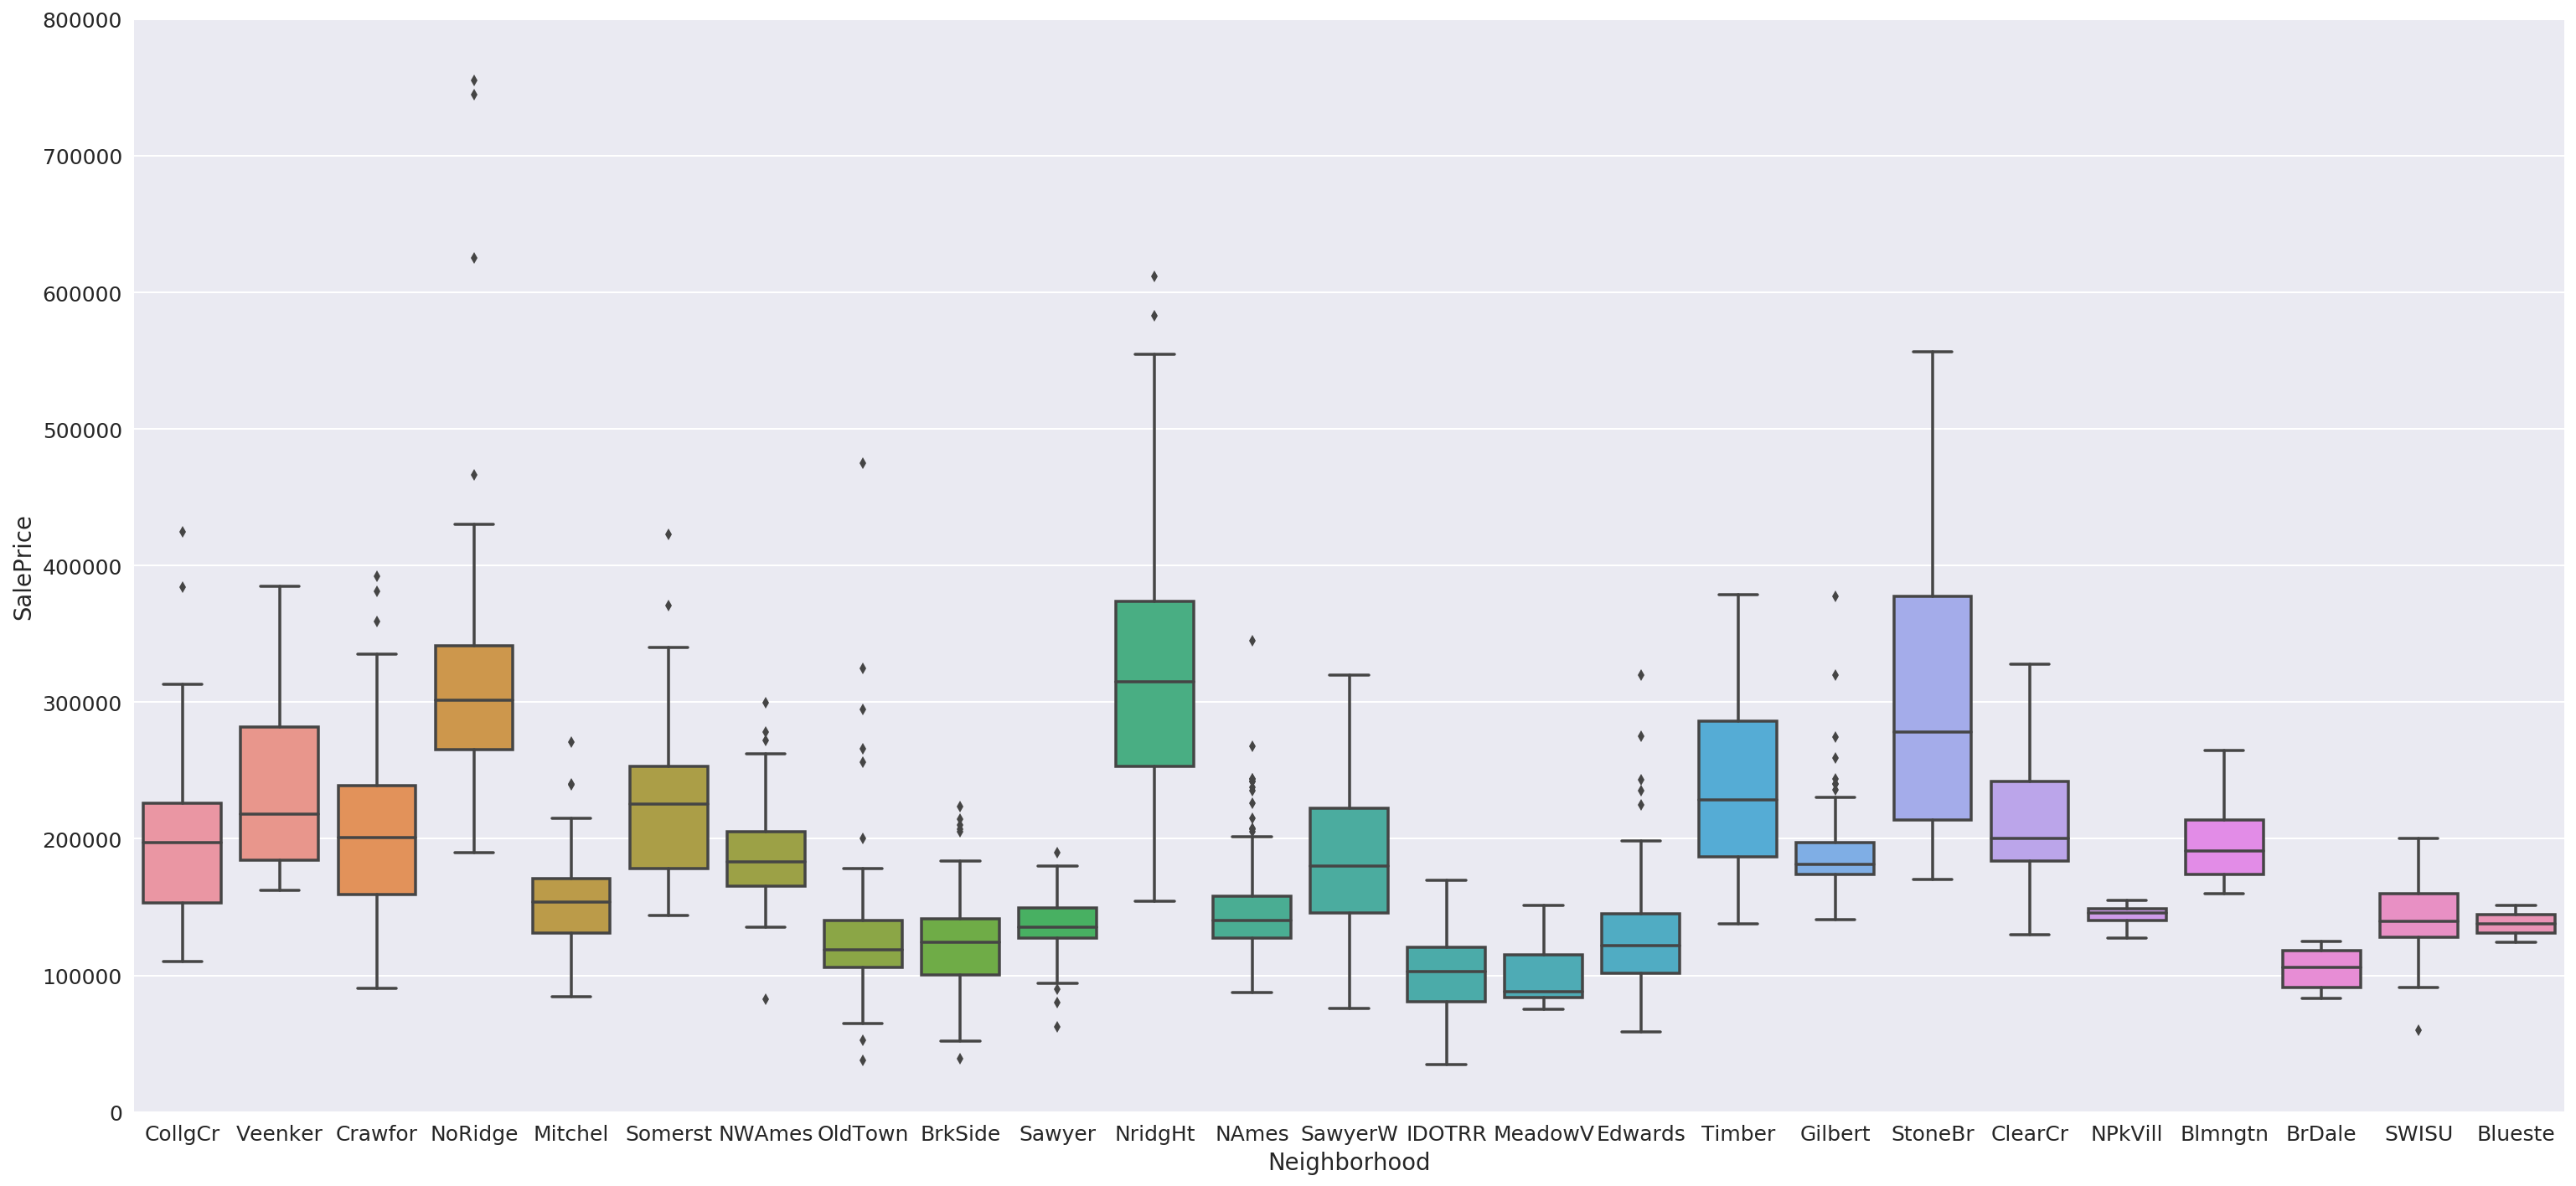

In [85]:
var = 'Neighborhood'

data = pd.concat([df_train[var], df_train['SalePrice']], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

+ 离散型的特征，一般使用箱线图看看分布情况。

## 连续型特征

LotArea：地块尺寸，平方英尺  
LotArea: Lot size in square feet

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


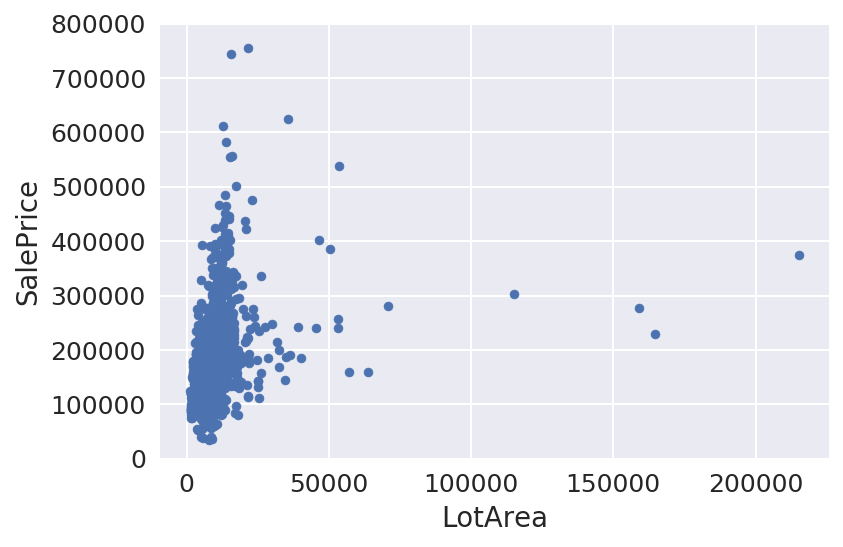

In [90]:
var = 'LotArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


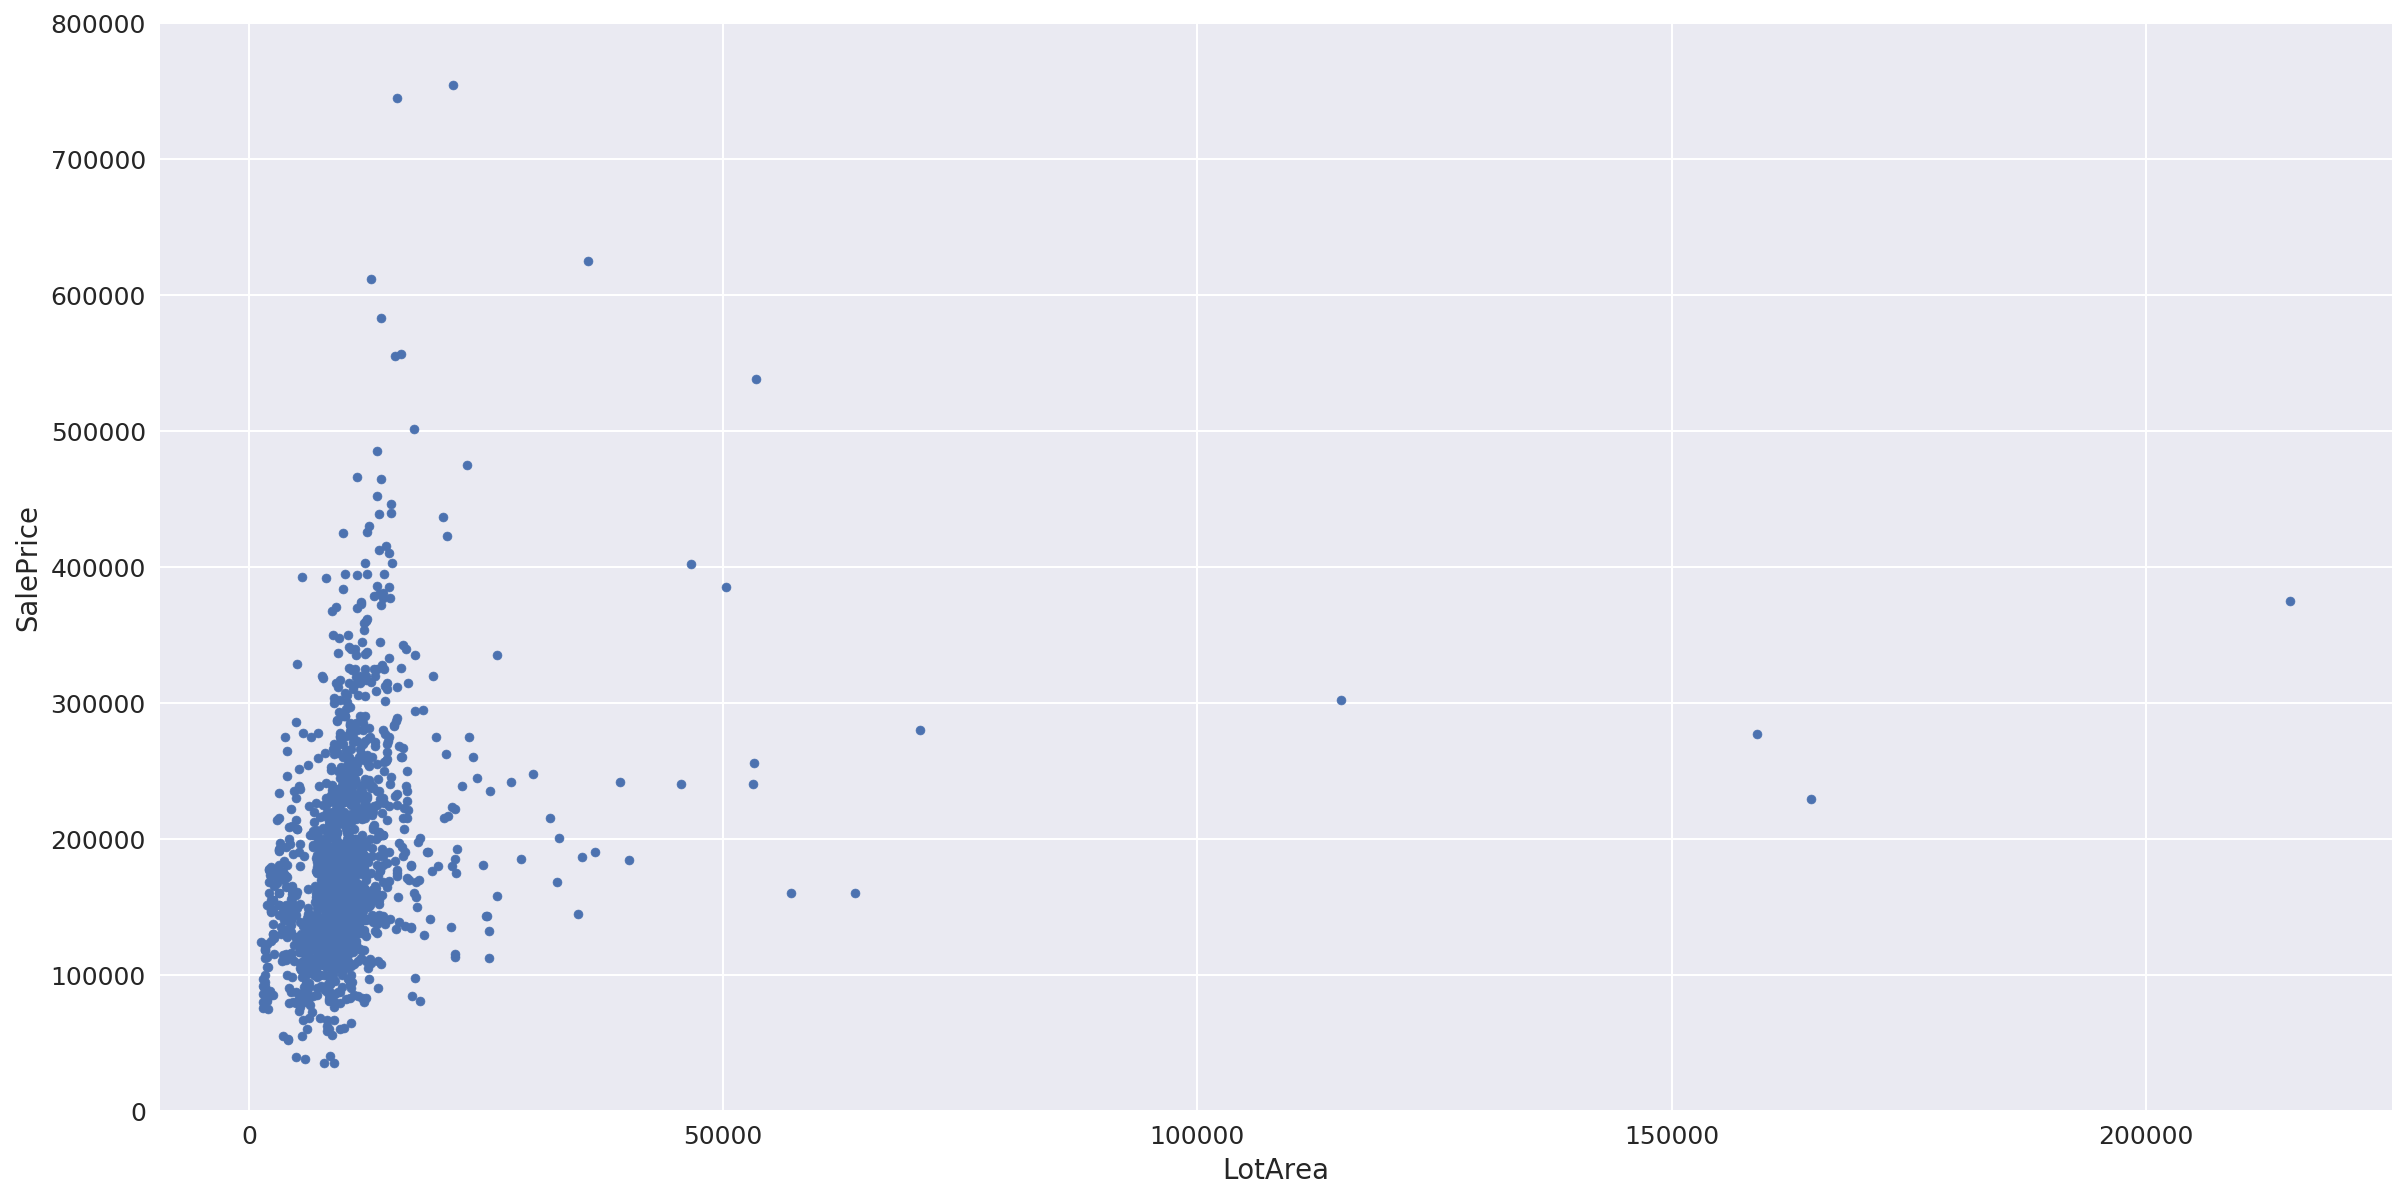

In [95]:
df_train.plot.scatter(x='LotArea', y='SalePrice',
                      ylim=(0, 800000), figsize=(20, 10))

GrLivArea：以上（地面）生活区平方英尺

GrLivArea: Above grade (ground) living area square feet

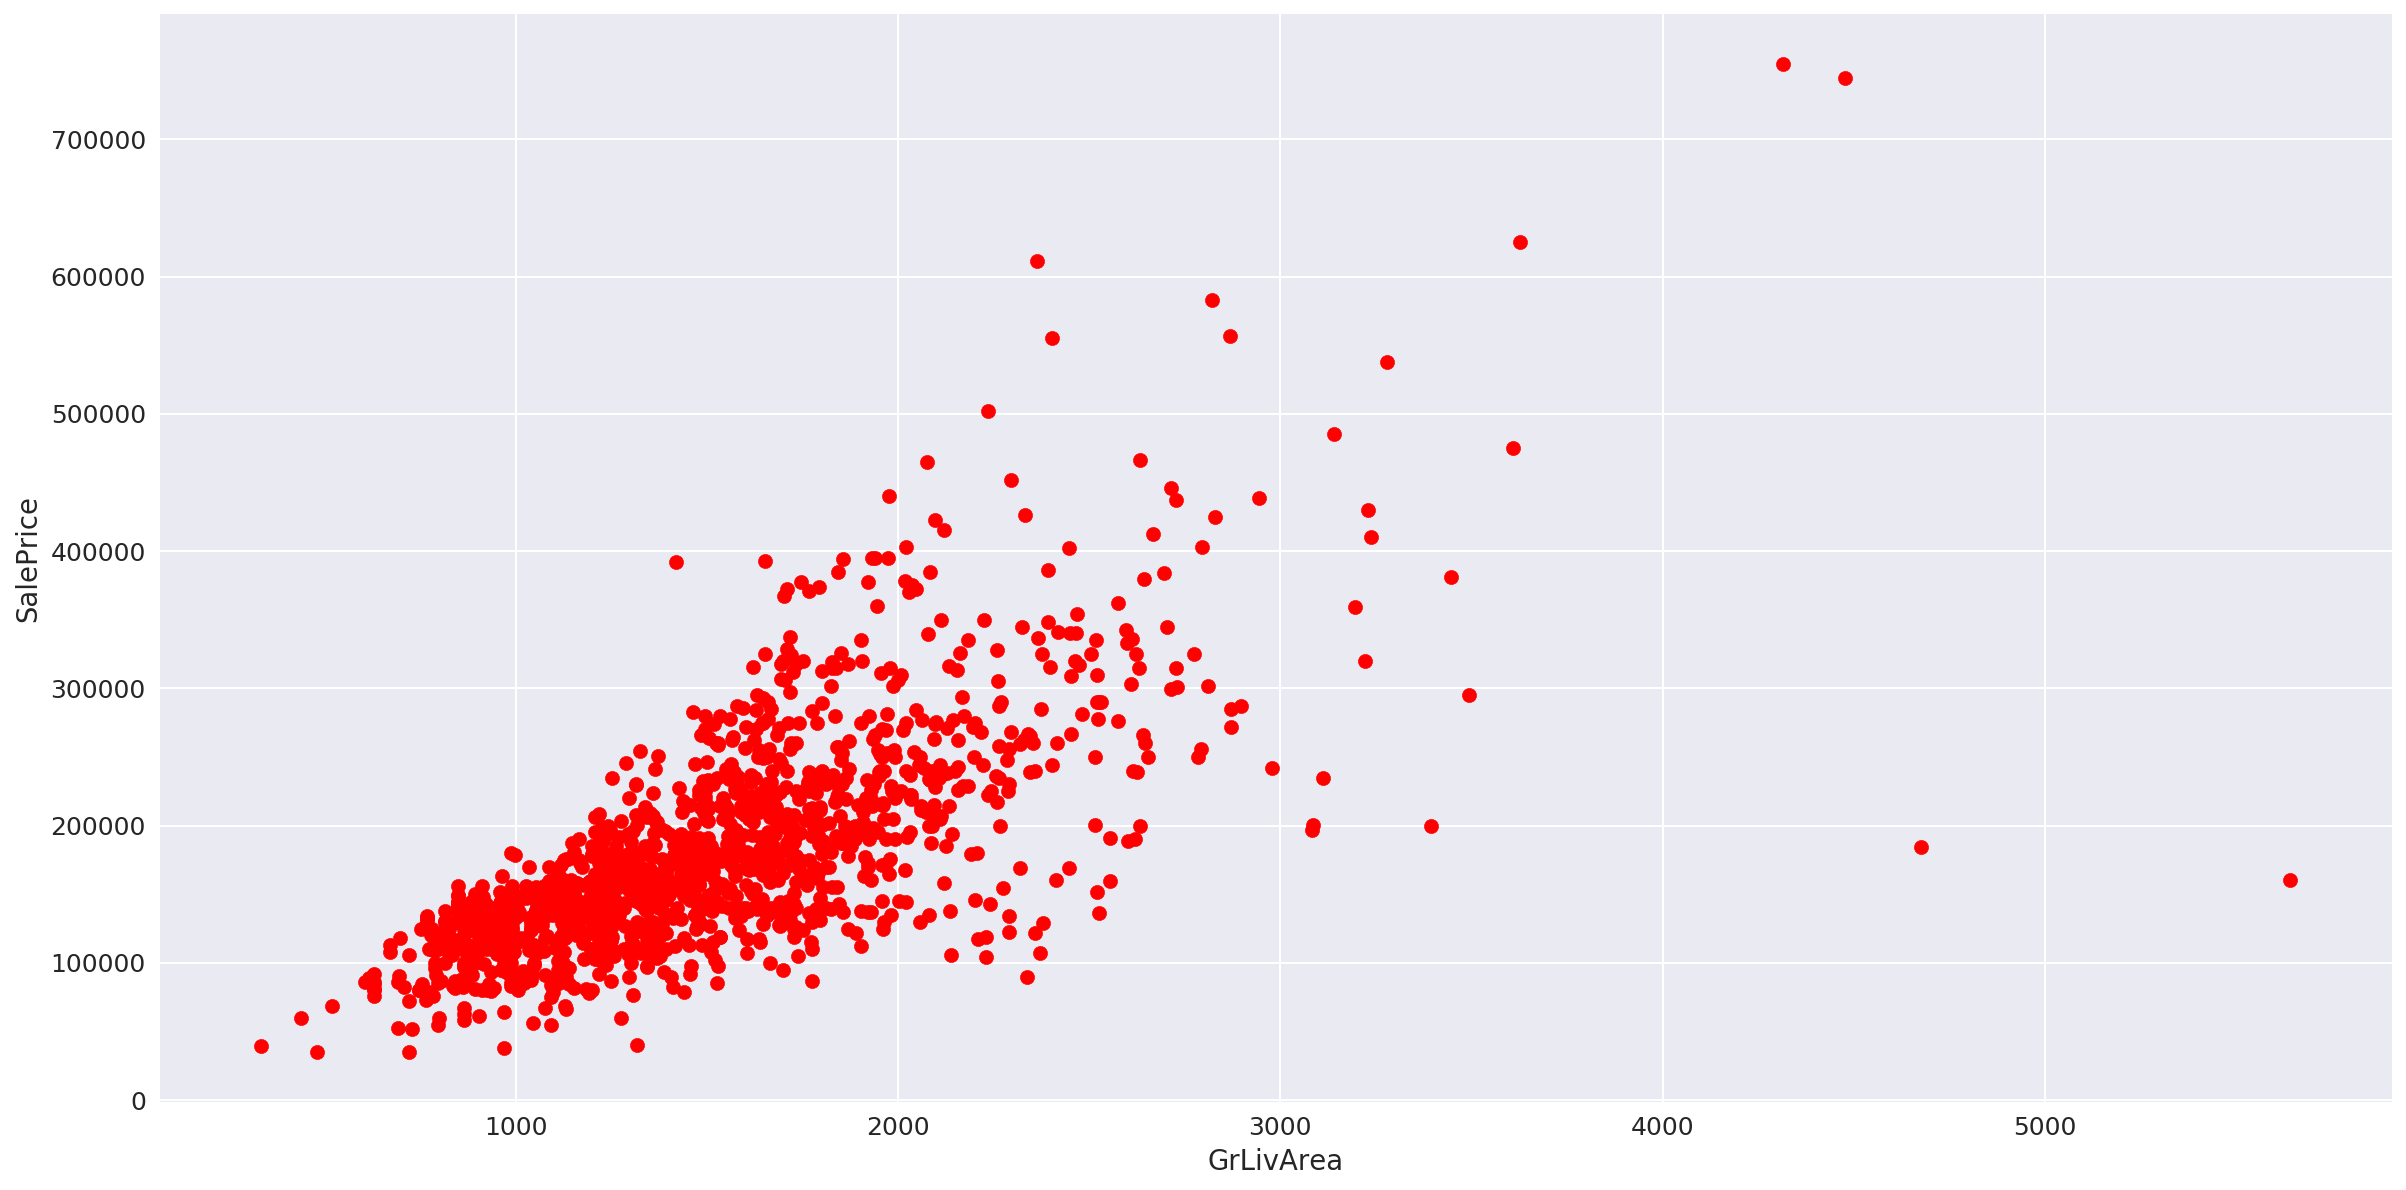

In [103]:
df_train.plot.scatter(x='GrLivArea', y='SalePrice',
                      figsize=(20, 10), s=50, c='r')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


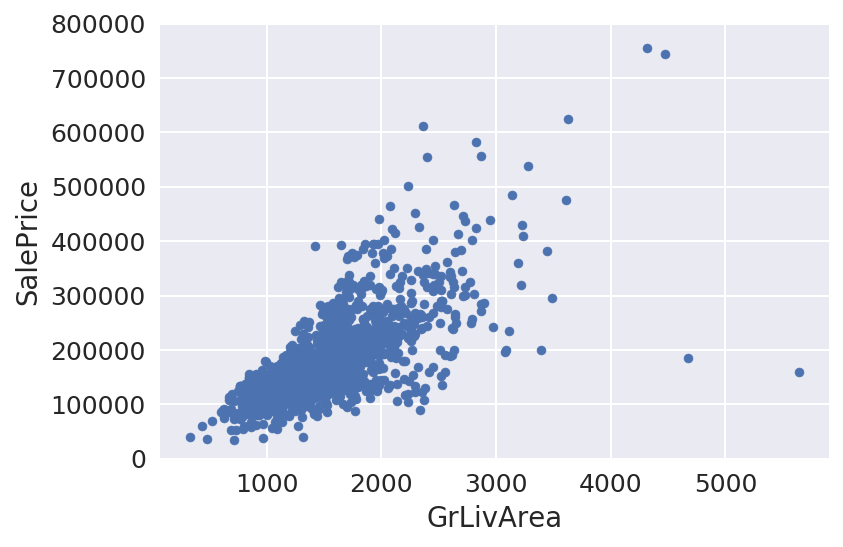

In [105]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

TotalBsmtSF: Total square feet of basement area

TotalBsmtSF: 基底面积总平方尺

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


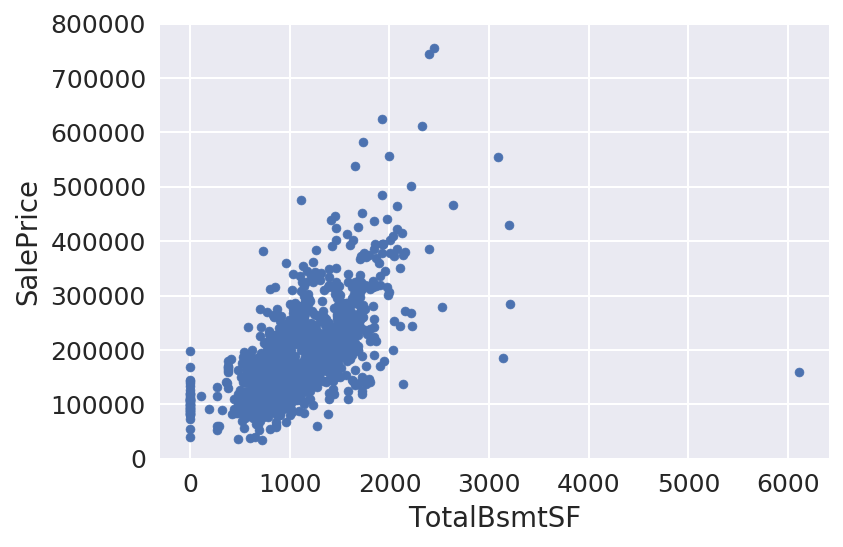

In [106]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

MiscVal: $Value of miscellaneous feature

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


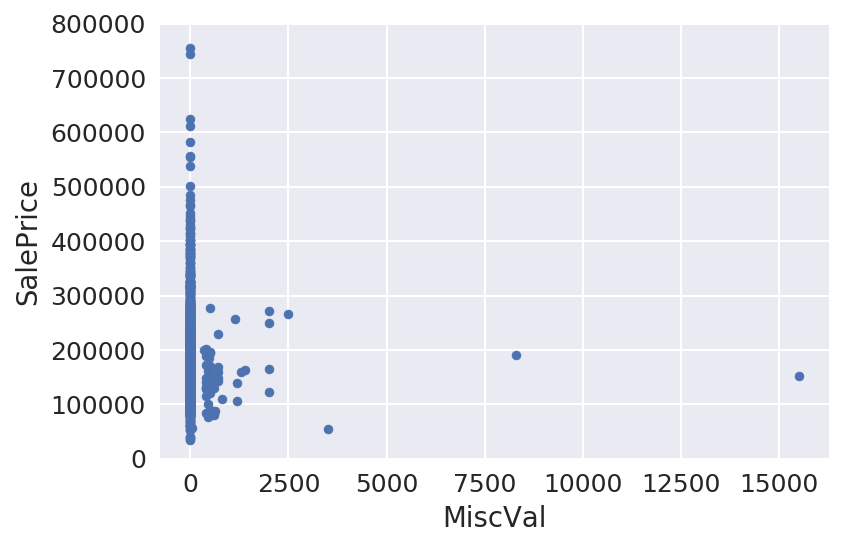

In [107]:
var = 'MiscVal'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


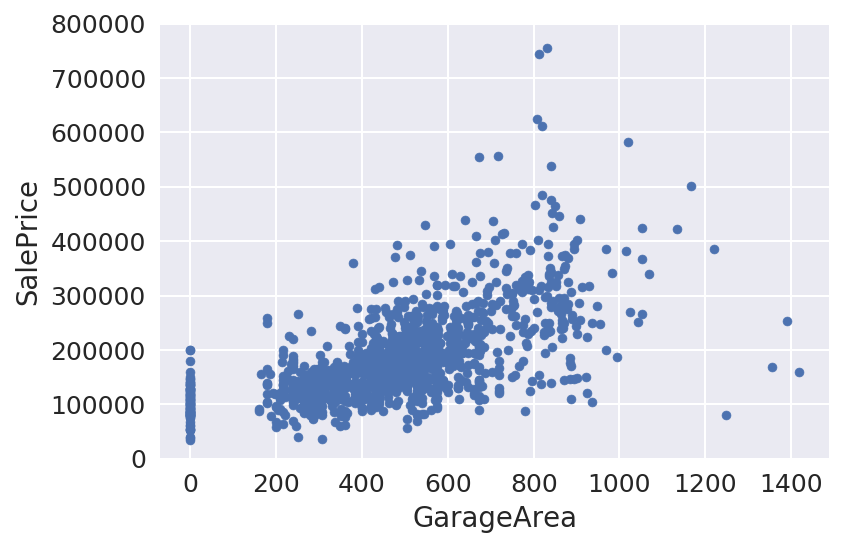

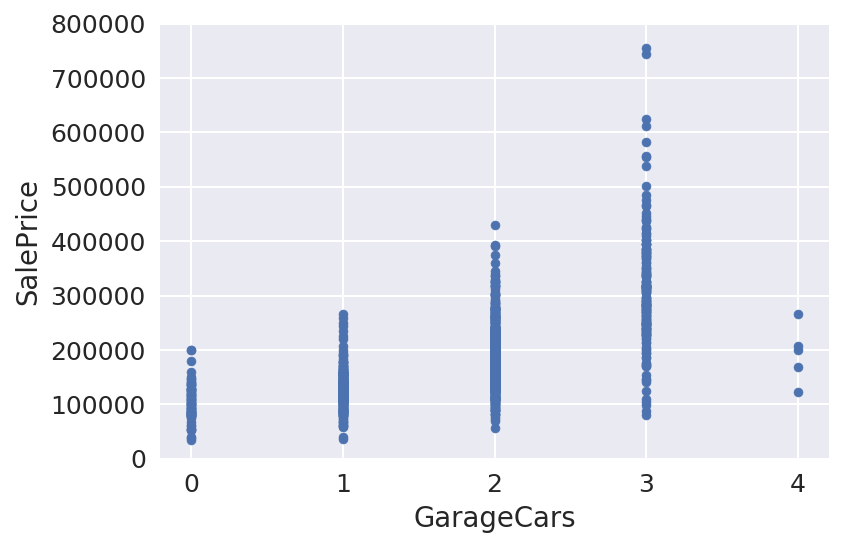

In [112]:
# GarageCars：车库容量的车库大小
# GarageArea：车库的面积，平方英尺
var = ['GarageArea', 'GarageCars']
df_train[var]

for index in range(len(var)):
    data = pd.concat([df_train[var[index]], df_train['SalePrice']], axis=1)
    data.plot.scatter(x=var[index], y='SalePrice', ylim=(0, 800000))

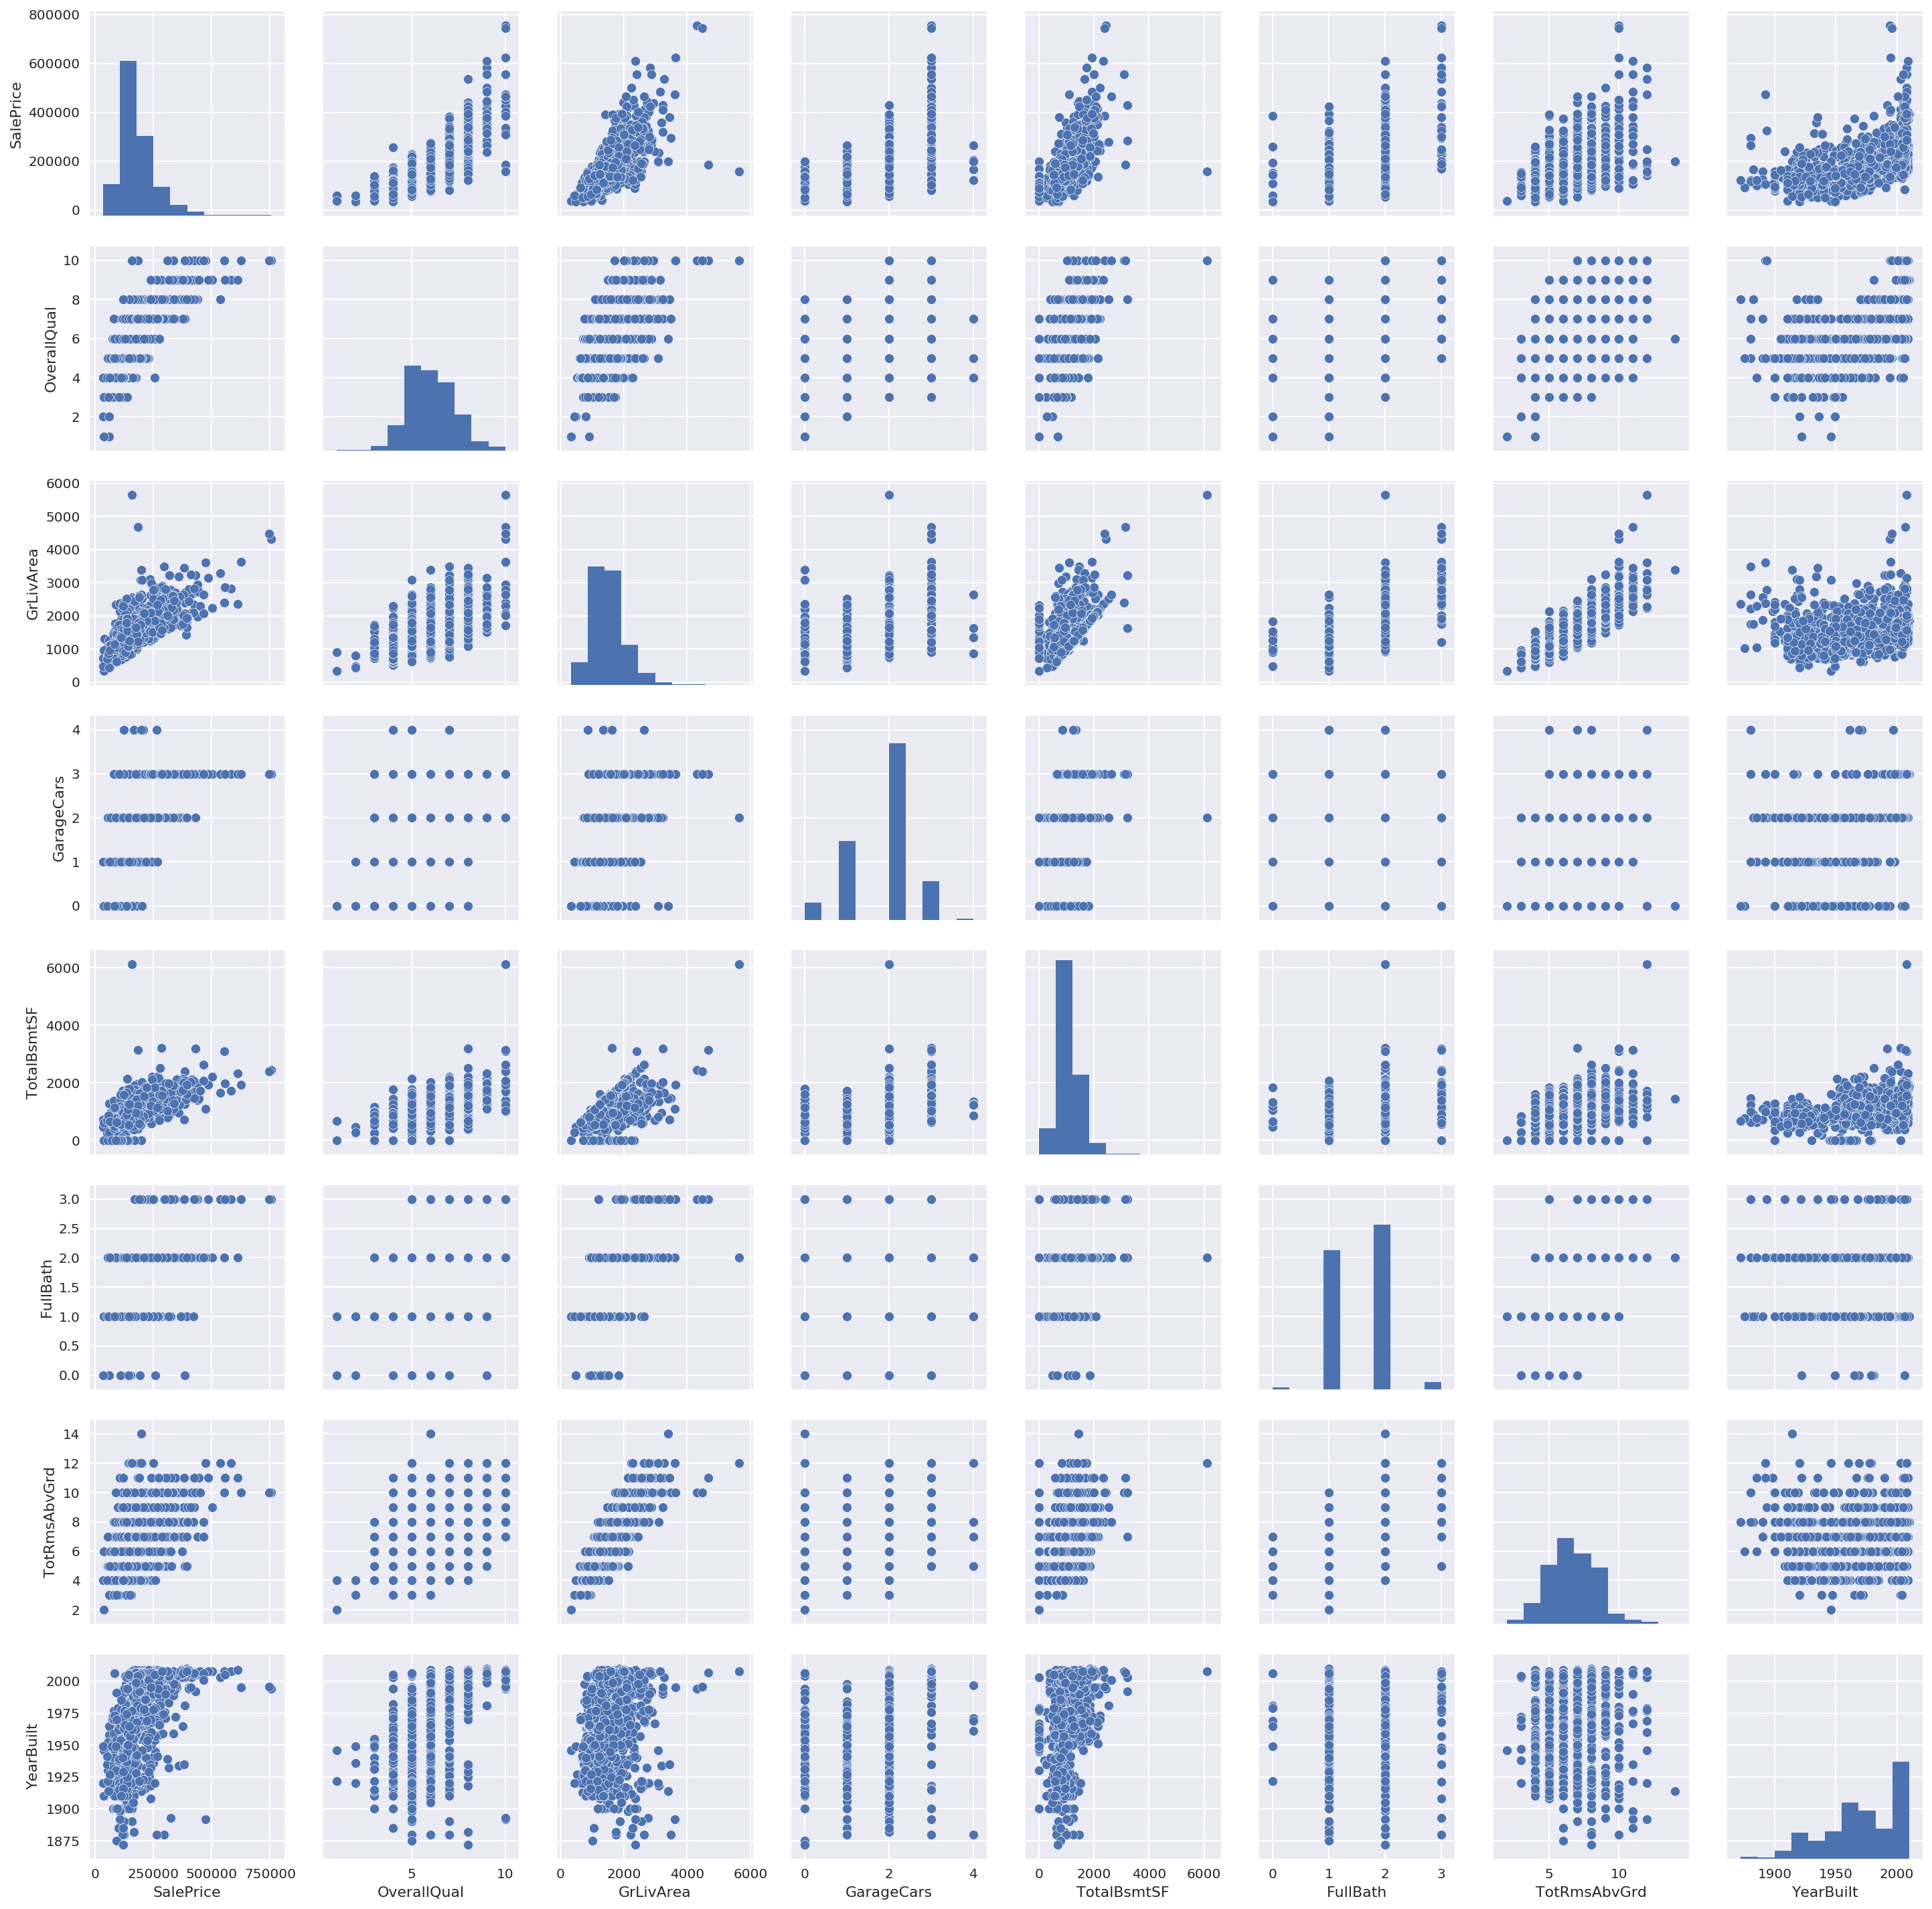

In [114]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
        'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

In [187]:
df_train['MSSubClass'] = df_train['MSSubClass'].astype(str)

In [189]:
df_train.dtypes

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


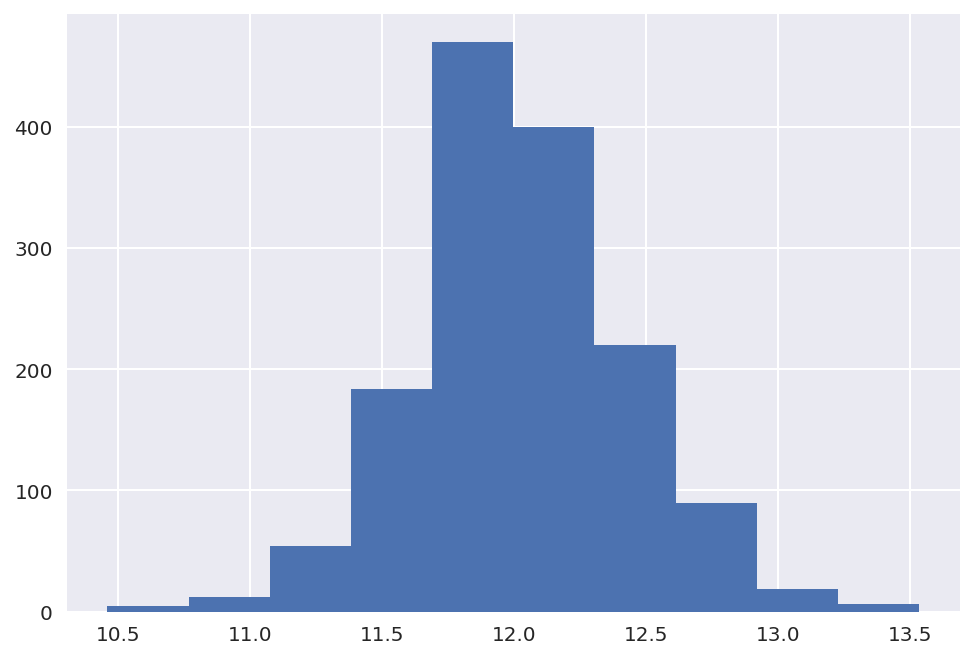

In [181]:
np.log1p(df_train['SalePrice']).hist()

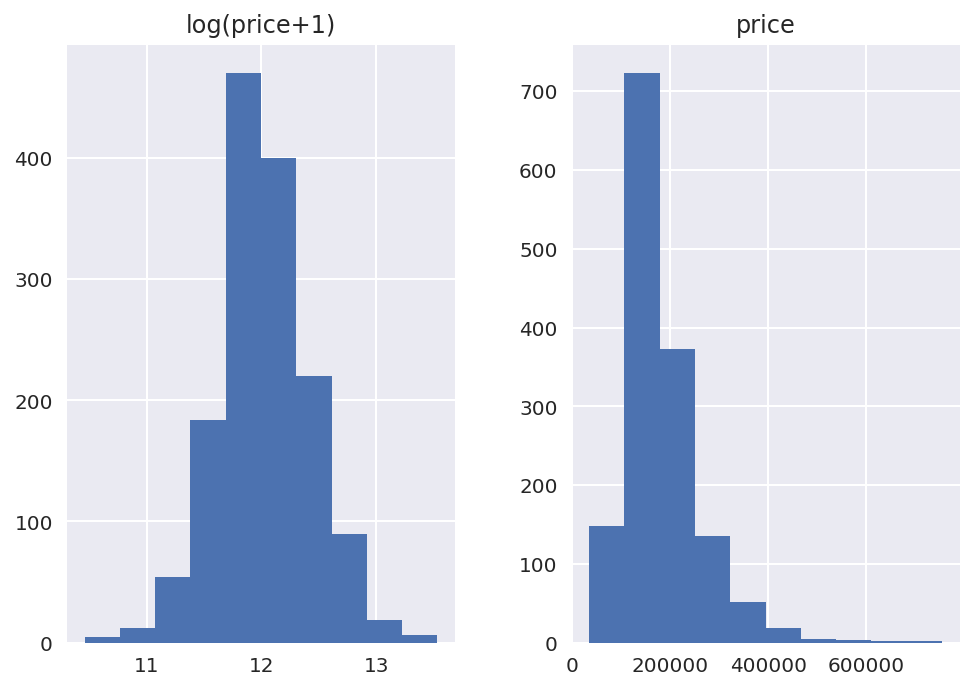

In [179]:
prices = pd.DataFrame(
    {'price': df_train['SalePrice'], 'log(price+1)': np.log1p(df_train['SalePrice'])})
prices.hist()
plt.show()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


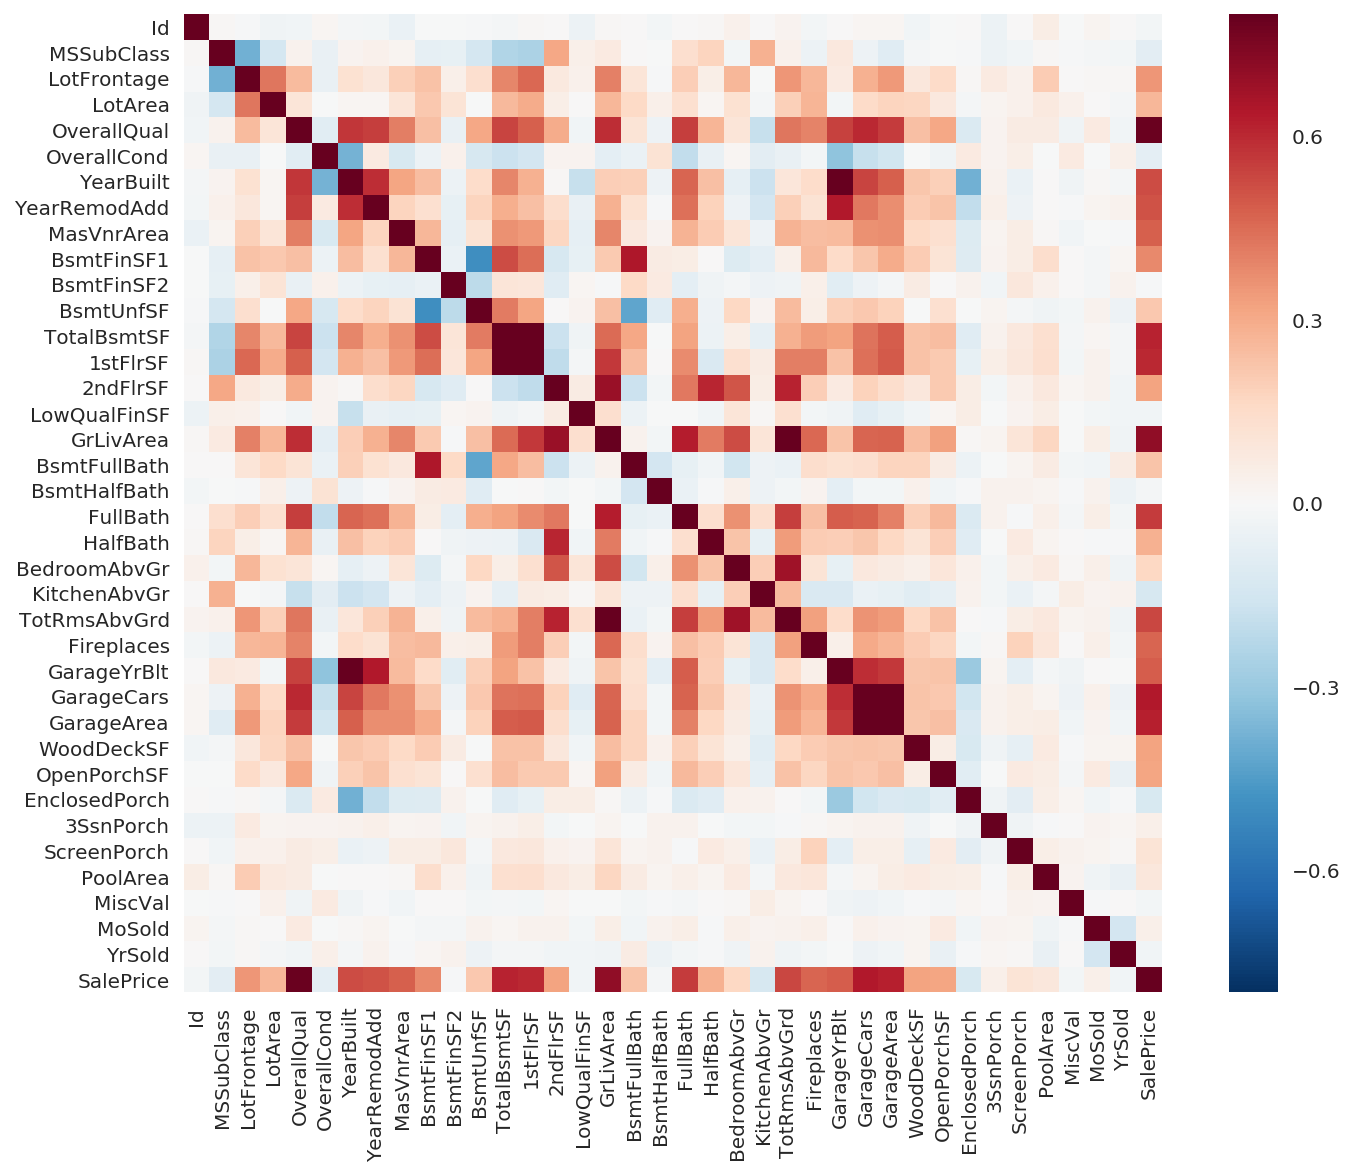

In [4]:
import seaborn as sns

# correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

这个 kernel 的做法是选择一些特征送入算法模型。

In [125]:
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [117]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars',
        'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']

In [123]:
X = df_train[cols].values
y = df_train['SalePrice'].values

In [130]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=.2, random_state=666)

In [138]:
clfs = {
    'svm': svm.SVR(),
    'random_forest_regression': RandomForestRegressor(n_estimators=5000),
    'BayesianRidge': linear_model.BayesianRidge()
}

In [142]:
%%time
scores = []
for clf in clfs:
    clfs[clf].fit(X_train, y_train)
    score = clfs[clf].score(X_test, y_test)
    scores.append(score)

In [143]:
scores

[0.759770755196984, 0.8440692786591922, 0.7660477221978305]

In [145]:
from sklearn.ensemble import RandomForestRegressor


X = df_train[cols].values
y = df_train['SalePrice'].values

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=666)

## 用随机森林预测不用归一化

In [149]:
rfr = RandomForestRegressor(n_estimators=5000)

rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.8433780091478622

## 我们关心的那一列只有一个缺失值

In [158]:
df_test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [165]:
df_test.loc[df_test['GarageCars'].isnull(
), 'GarageCars'] = df_test['GarageCars'].mean()
df_test.loc[df_test['TotalBsmtSF'].isnull(
), 'TotalBsmtSF'] = df_test['TotalBsmtSF'].mean()
df_test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

```
cols2 = ['OverallQual','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
cars = data_test['GarageCars'].fillna(1.766118)
bsmt = data_test['TotalBsmtSF'].fillna(1046.117970)
data_test_x = pd.concat( [data_test[cols2], cars, bsmt] ,axis=1)
data_test_x.isnull().sum()
```

In [167]:
X_from_test = df_test[cols].values
y_pred = rfr.predict(X_from_test)

In [169]:
out = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_pred})
out

,Id,SalePrice
0,1461,118123.033400
1,1462,145901.647000
2,1463,168253.629940
3,1464,180739.219524
4,1465,209723.241200
5,1466,182208.542286
6,1467,168843.341800
7,1468,177759.520000
8,1469,180916.220100
9,1470,114866.637800


In [170]:
out.to_csv('house_prices_20180921.csv', index=None)
# out.to_csv('house_prices_20180921.csv', index=False)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


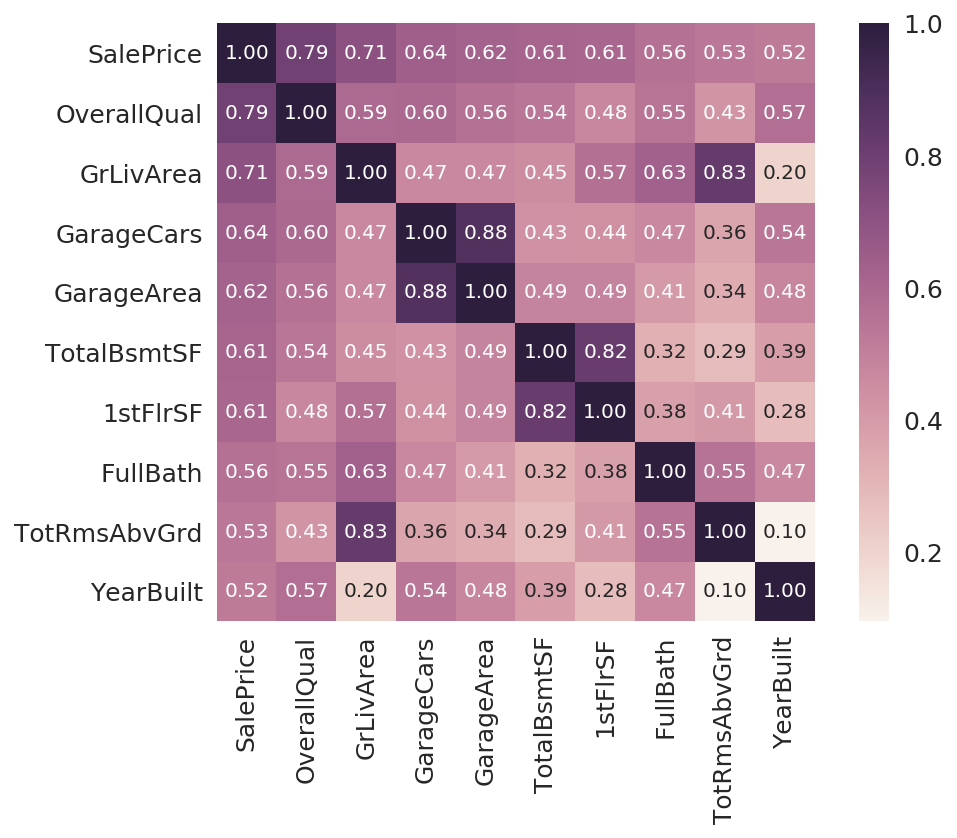

In [5]:
# saleprice correlation matrix
k = 10  # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={
                 'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [6]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()
           ).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [7]:
# dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


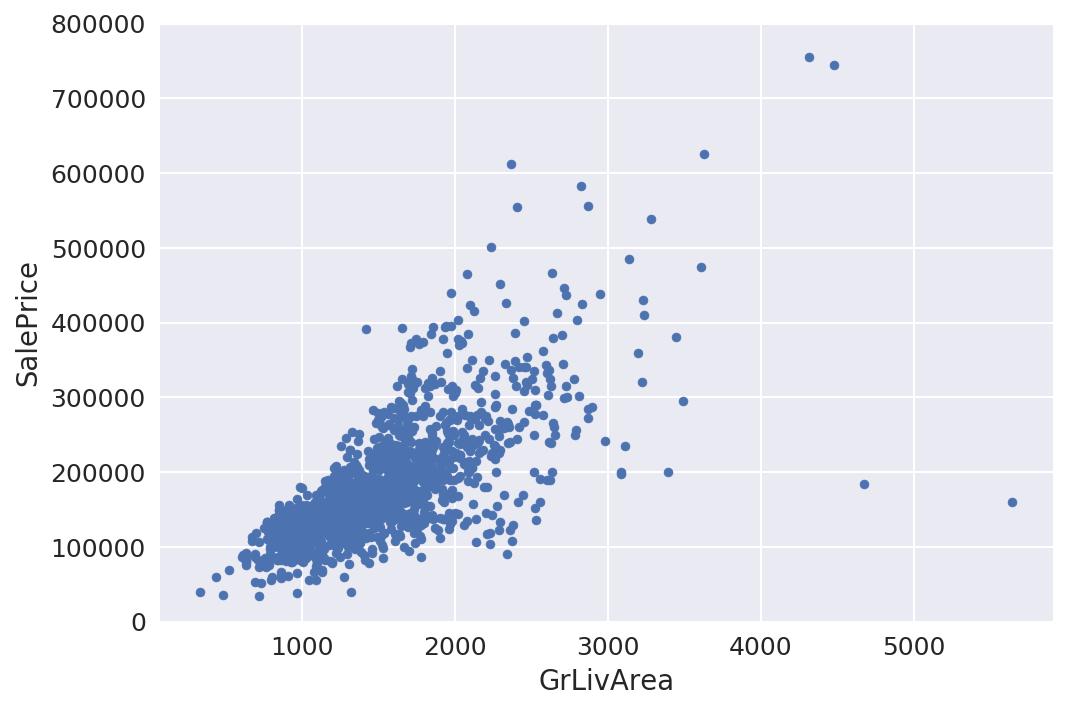

In [8]:
# bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

In [9]:
# deleting points
df_train.sort_values(by='GrLivArea', ascending=False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


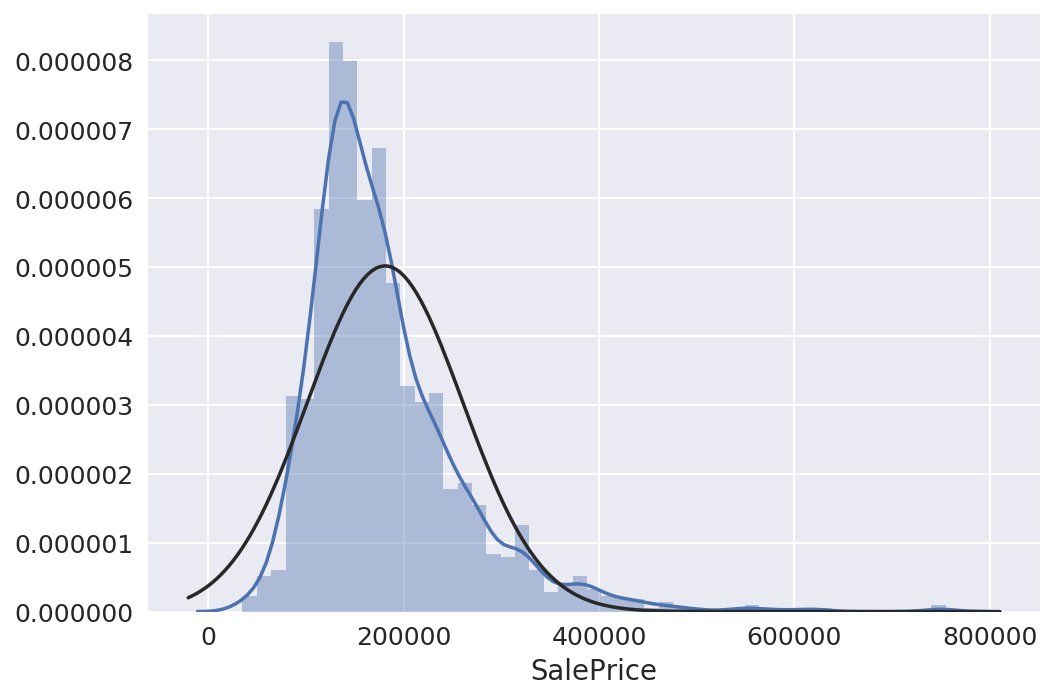

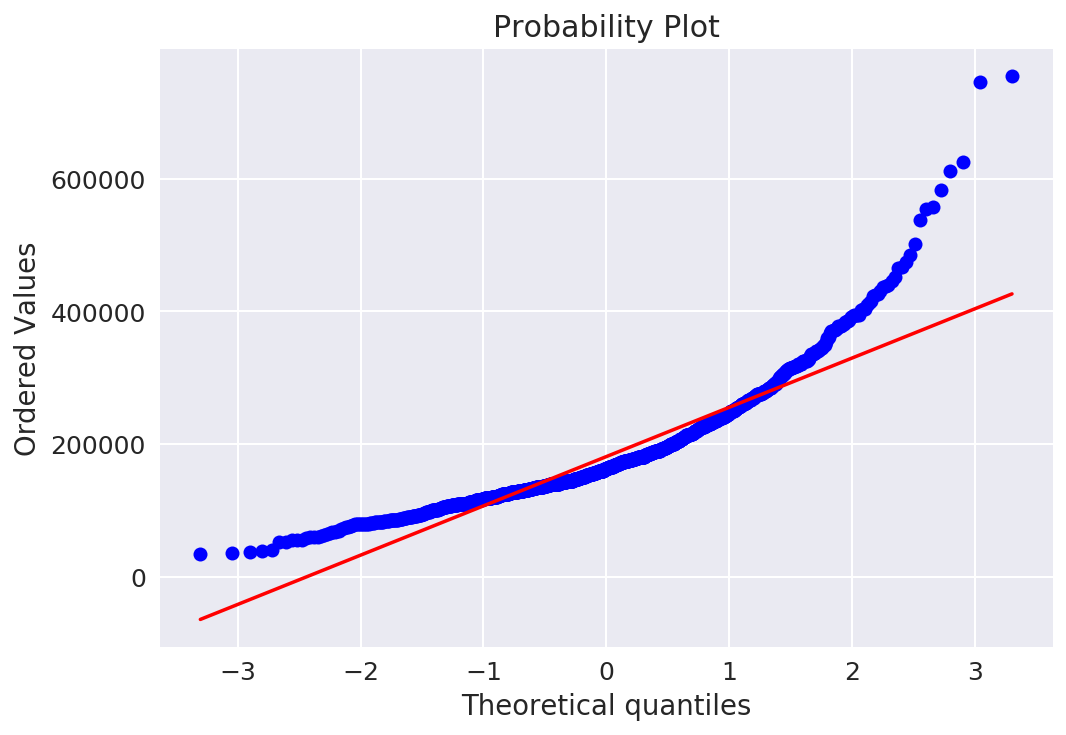

In [12]:
from scipy.stats import norm
from scipy import stats

# histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [13]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

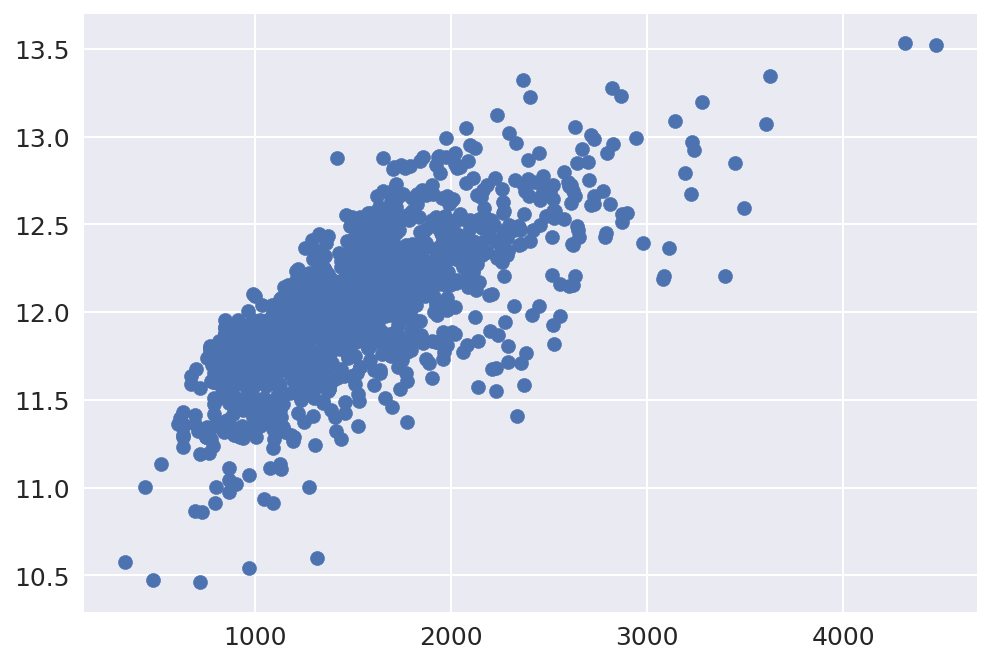

In [14]:
# scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

In [15]:
# data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


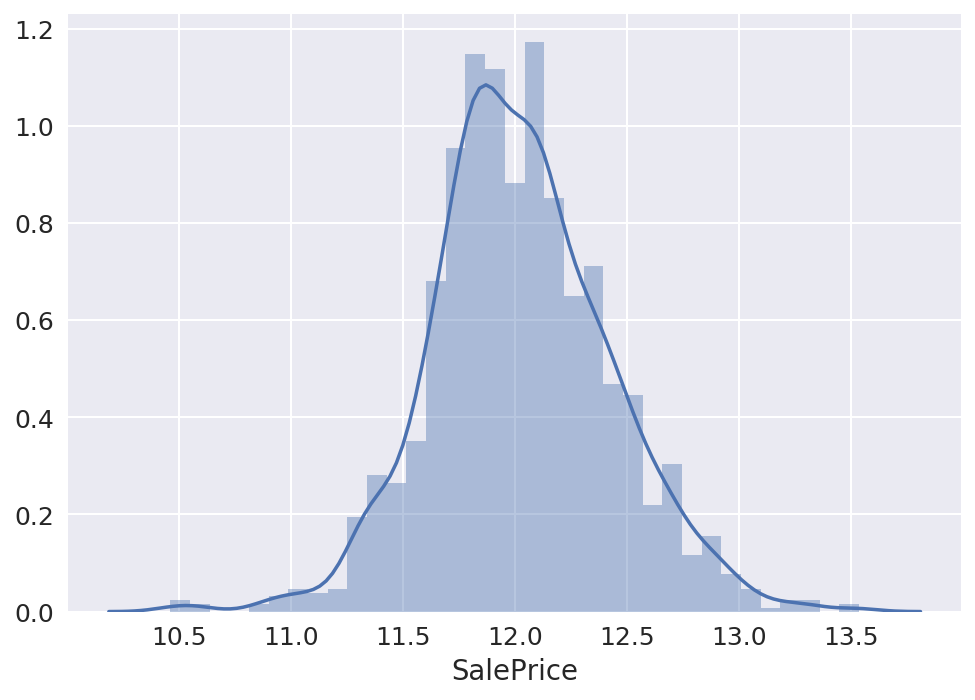

In [18]:
sns.distplot(df_train['SalePrice'])
plt.show()

In [19]:
df_train['SalePrice'].skew()

0.12155100983632659

In [20]:
df_train['SalePrice'].kurt()

0.802159203786005